## 4th Homework - Evaluation metrics

In [44]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [15]:
df = pd.read_csv(r'bank+marketing\bank\bank-full.csv',delimiter=";", encoding="utf-8")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We need bank-full.csv.

In this dataset the target variable is y variable - has the client subscribed a term deposit or not.

## Dataset preparation
For the rest of the homework, you'll need to use only these columns:

'age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y'
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
df_train_full, df_val = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_test = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(27126, 9043, 9042)

## Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

balance
day
duration
previous

In [20]:
numerical_vars = ['balance', 'day', 'duration', 'previous']

auc_scores = {}

for var in numerical_vars:

    auc = roc_auc_score(df_train.y, df_train[var])
    
    # If AUC < 0.5, invert the variable by multiplying by -1
    if auc < 0.5:
        auc = roc_auc_score(df_train.y, -df_train[var])  # Invert variable if AUC < 0.5

    auc_scores[var] = auc

for var, auc in auc_scores.items():
    print(f"Feature: {var}, AUC: {auc:.3f}")

best_feature = max(auc_scores, key=auc_scores.get)
print(f"The numerical variable with the highest AUC is: {best_feature}")

Feature: balance, AUC: 0.589
Feature: day, AUC: 0.526
Feature: duration, AUC: 0.815
Feature: previous, AUC: 0.599
The numerical variable with the highest AUC is: duration


## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.69
0.79
0.89
0.99

In [25]:
X_train_full, y_train_full = df_train_full.drop(['y'], axis=1).copy(), df_train_full['y'].copy()
X_train, y_train = df_train.drop(['y'], axis=1).copy(), df_train['y'].copy()
X_val, y_val = df_val.drop(['y'], axis=1).copy(), df_val['y'].copy()
X_test, y_test = df_test.drop(['y'], axis=1).copy(), df_test['y'].copy()

train_full_dicts = X_train_full.to_dict(orient='records')
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False).set_output(transform='pandas').fit(train_dicts)

X_train_full = dv.transform(train_full_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

X_train.head(5)

,age,balance,campaign,contact=cellular,contact=telephone,contact=unknown,day,default=no,default=yes,duration,...,month=may,month=nov,month=oct,month=sep,pdays,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,previous
0,56.0,40.0,2.0,1.0,0.0,0.0,11.0,1.0,0.0,123.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
1,33.0,4790.0,1.0,1.0,0.0,0.0,20.0,1.0,0.0,137.0,...,0.0,0.0,0.0,0.0,272.0,1.0,0.0,0.0,0.0,2.0
2,32.0,392.0,2.0,1.0,0.0,0.0,21.0,1.0,0.0,148.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
3,40.0,2129.0,1.0,1.0,0.0,0.0,30.0,1.0,0.0,452.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
4,54.0,1180.0,2.0,1.0,0.0,0.0,19.0,1.0,0.0,394.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0


In [27]:
y_train_full = y_train_full.map({"no":0, "yes":1}).astype('int')
y_train = y_train.map({"no":0, "yes":1}).astype('int')
y_val = y_val.map({"no":0, "yes":1}).astype('int')
y_test = y_test.map({"no":0, "yes":1}).astype('int')

In [28]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [29]:
y_pred_val = model.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred_val), 2)

0.91

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.265
0.465
0.665
0.865

In [37]:
recalls = []
precisions = []
thresholds = np.arange(0, 1, 0.01)

# Iterate over thresholds to calculate precision and recall
for t in thresholds:
    predictions_true = y_pred_val >= t
    predictions_false = y_pred_val < t
    actual_true = y_val == 1
    actual_false = y_val == 0

    TP = (predictions_true & actual_true).sum()
    FP = (predictions_true & actual_false).sum()
    FN = (predictions_false & actual_true).sum()

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    precisions.append(precision)
    recalls.append(recall)


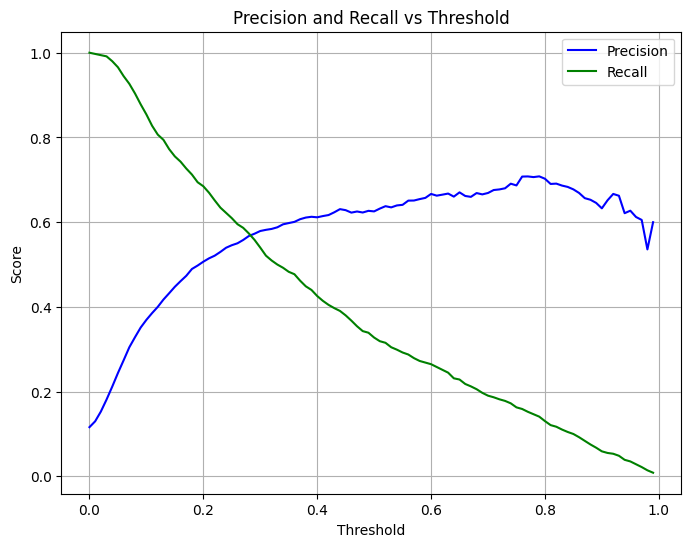

The threshold where precision and recall curves intersect: 0.28


In [39]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', color='b')
plt.plot(thresholds, recalls, label='Recall', color='g')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Find the threshold where precision and recall intersect
diffs = np.abs(np.array(precisions) - np.array(recalls))
min_diff_idx = np.argmin(diffs)
intersect_threshold = thresholds[min_diff_idx]

print(f"The threshold where precision and recall curves intersect: {intersect_threshold:.2f}")

## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

0.02
0.22
0.42
0.62

In [43]:
data = {
    'Threshold': thresholds,
    'Precision': precisions,
    'Recall': recalls
}

df_scores = pd.DataFrame(data)

# Calculate F1 score for each threshold
df_scores['F1'] = 2 * (df_scores['Precision'] * df_scores['Recall']) / (df_scores['Precision'] + df_scores['Recall'])

# Find the threshold where F1 score is maximal
max_f1_threshold = df_scores.loc[df_scores['F1'].idxmax(), 'Threshold']
max_f1_score = df_scores['F1'].max()

print(df_scores)

print(f"The threshold where F1 score is maximal: {max_f1_threshold:.3f}")
print(f"Maximum F1 score: {max_f1_score:.3f}")

    Threshold  Precision    Recall        F1
0        0.00   0.116112  1.000000  0.208065
1        0.01   0.129933  0.997143  0.229908
2        0.02   0.152900  0.994286  0.265042
3        0.03   0.181233  0.991429  0.306447
4        0.04   0.211772  0.980000  0.348282
..        ...        ...       ...       ...
95       0.95   0.627119  0.035238  0.066727
96       0.96   0.612245  0.028571  0.054595
97       0.97   0.605263  0.021905  0.042279
98       0.98   0.535714  0.014286  0.027829
99       0.99   0.600000  0.008571  0.016901

[100 rows x 4 columns]
The threshold where F1 score is maximal: 0.200
Maximum F1 score: 0.582


## Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

0.0001
0.006
0.06
0.26

In [45]:
def train(X, y):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)
    return model

def predict(X, model):
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
aucs = []

for train_idx, val_idx in kfold.split(X_train_full, y_train_full):
    train_X = X_train_full.iloc[train_idx]
    val_X = X_train_full.iloc[val_idx]

    train_y = y_train_full.iloc[train_idx]
    val_y = y_train_full.iloc[val_idx]

    model = train(train_X, train_y)
    y_pred_val = predict(val_X, model)

    auc = roc_auc_score(val_y, y_pred_val)
    aucs.append(auc)

print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))
     

auc = 0.906 ± 0.005


## Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.000001
0.001
1
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [46]:
def train(X, y, C):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    return model

for C in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, val_idx in kfold.split(X_train_full, y_train_full):
        train_X = X_train_full.iloc[train_idx]
        val_X = X_train_full.iloc[val_idx]

        train_y = y_train_full.iloc[train_idx]
        val_y = y_train_full.iloc[val_idx]

        model = train(train_X, train_y, C=C)
        y_pred_val = predict(val_X, model)

        auc = roc_auc_score(val_y, y_pred_val)
        scores.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06, auc = 0.702 ± 0.009
C=0.001, auc = 0.866 ± 0.007
C=1, auc = 0.906 ± 0.005
